In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


C:\Users\natha\AppData\Local\Temp\ipykernel_17028\4230798653.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

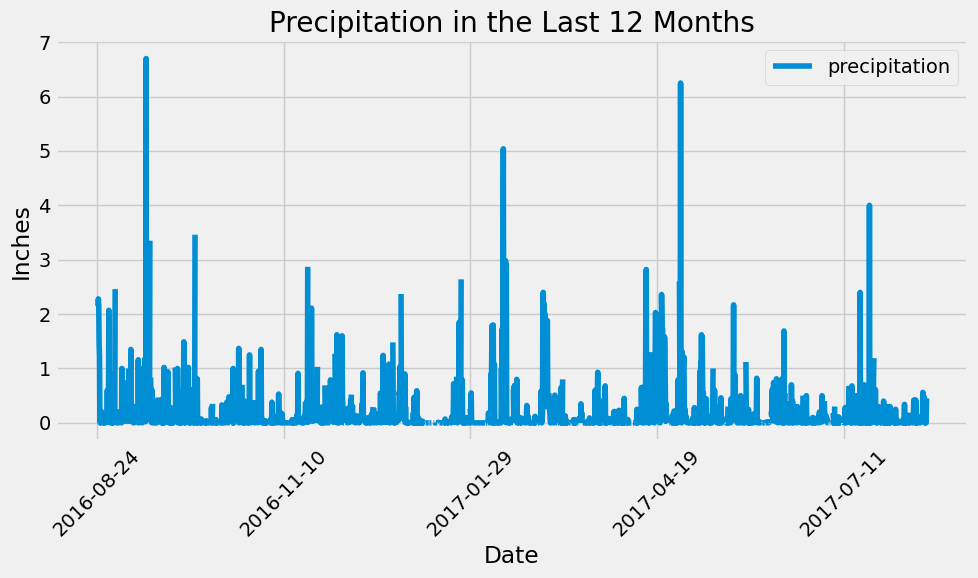

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
one_year_ago = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d') - dt.timedelta(days=365)
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='date', y='precipitation', figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation in the Last 12 Months")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df.describe()
summary_stats

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
f"[({total_stations})]"

'[(9)]'

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active_station = most_active_stations[0][0]
print(f"Most active station: {most_active_station}")

# List the stations and their counts in descending order.
for station, count in most_active_stations:
    print(f"({station}, {count})")

Most active station: USC00519281
(USC00519281, 2772)
(USC00519397, 2724)
(USC00513117, 2709)
(USC00519523, 2669)
(USC00516128, 2612)
(USC00514830, 2202)
(USC00511918, 1979)
(USC00517948, 1372)
(USC00518838, 511)


In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Query to calculate min, max, and average temperatures for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()

print(f"(Most Active ID: {most_active_station}):")
print(f"({temperature_stats[0]}, {temperature_stats[1]}, {temperature_stats[2]})")



(Most Active ID: USC00519281):
(54.0, 85.0, 71.66378066378067)


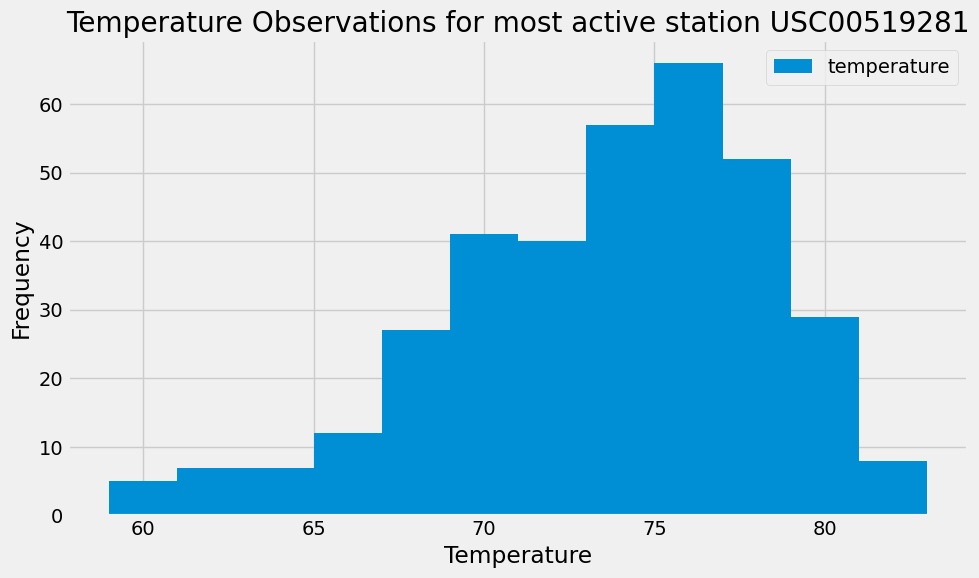

In [39]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observation_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()
temperature_observation_df = pd.DataFrame(temperature_observation_data, columns=['date', 'temperature'])
temperature_observation_df.plot(kind='hist', bins=12, figsize=(10, 6))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Temperature Observations for most active station {most_active_station}")
plt.tight_layout()
plt.show()

# Close Session

In [40]:
# Close Session
session.close()